**Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


**Dataset**

In [2]:
customer_data = pd.read_csv("/content/drive/MyDrive/prodigy infotech task2/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
X = customer_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

**Visualize the data points**

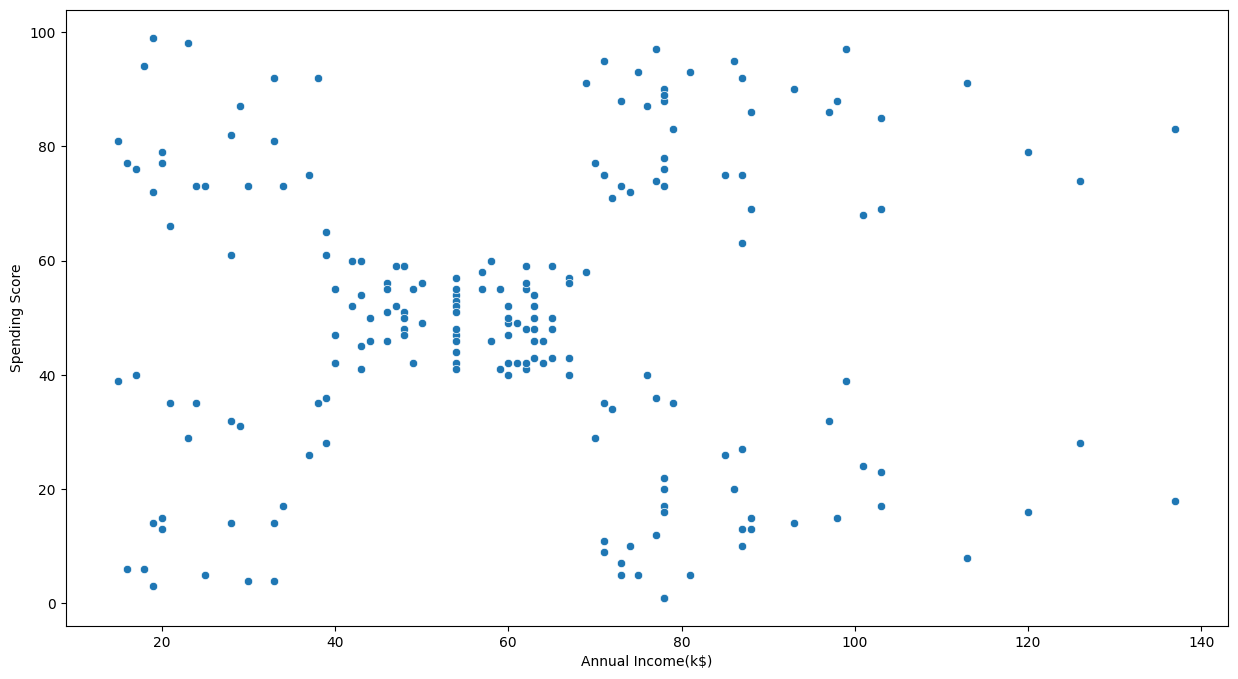

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X[:,0], y=X[:, 1])
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

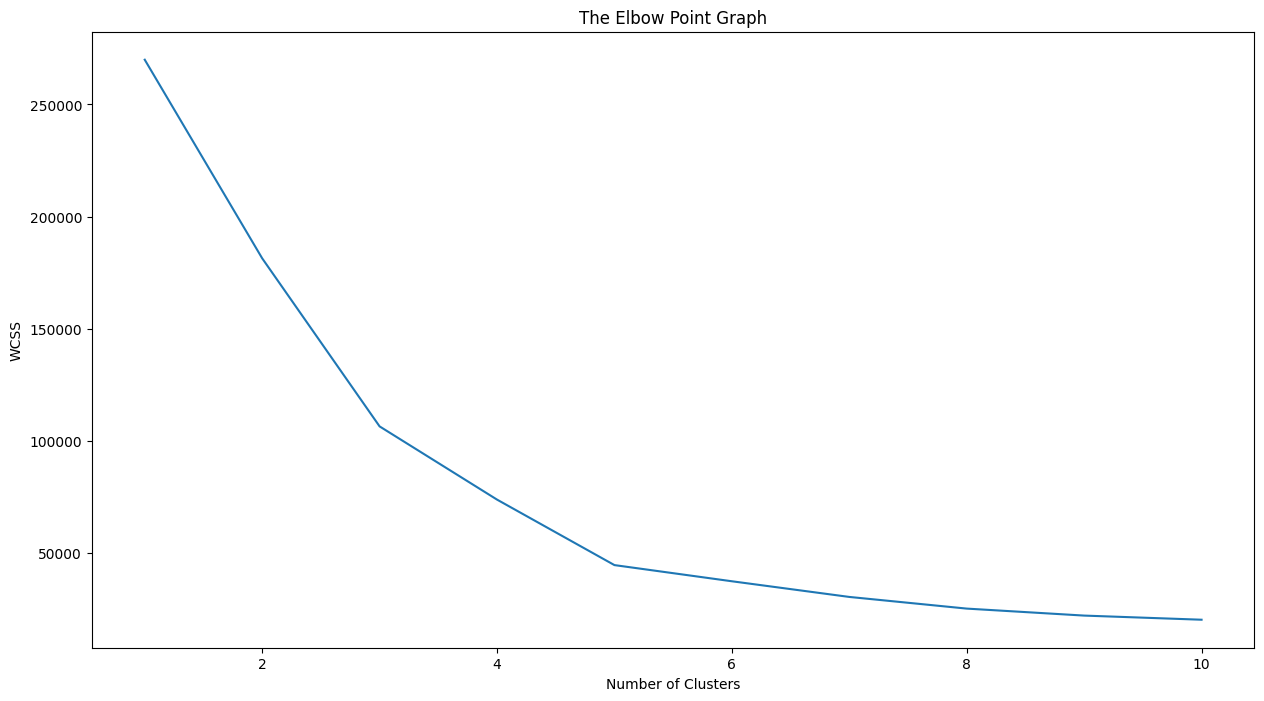

In [16]:
wcss=[]
for ii in range(1,11):
  kmeans=KMeans(n_clusters=ii,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [22]:
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=Kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
Kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

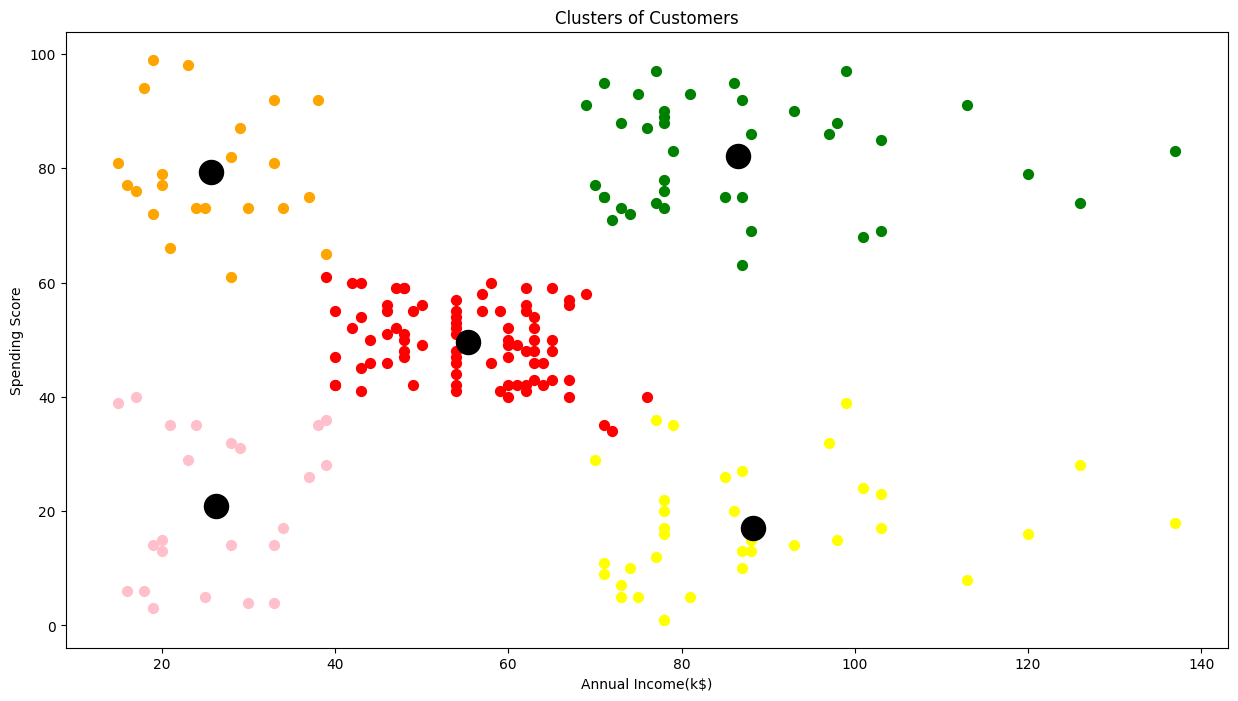

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='green',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='pink',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='Cluster 5')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score')
plt.show()